In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### Read in csv (average steps by country):

In [138]:
pa = pd.read_csv('./data/world_map_steps_average_20170510.csv')

In [139]:
pa.head()

,region,steps_mean_filtered
0,Albania,5788.506180
1,Algeria,4205.991197
2,Argentina,4852.163338
3,Armenia,5664.838315
4,Australia,4941.485728


In [140]:
pa.columns = ['Country', 'avg_steps']

### Convert decimals to whole numbers

In [141]:
pa['avg_steps'] = pa.avg_steps.astype(int)

In [142]:
pa.head()

,Country,avg_steps
0,Albania,5788
1,Algeria,4205
2,Argentina,4852
3,Armenia,5664
4,Australia,4941


### Add a rank column

In [143]:
pa['rank'] = pa.avg_steps.rank(ascending = False).astype(int)
pa.sort_values('rank')

,Country,avg_steps,rank
41,Hong Kong SAR China,6879,1
60,Macau SAR China,6346,2
21,China,6188,3
103,Ukraine,6106,4
51,Japan,6009,5
11,Belarus,5976,6
86,Russia,5969,7
94,Spain,5935,8
96,Sweden,5862,9
0,Albania,5788,10


### Plot top 10 countries with most average steps

In [144]:
top_10 = pa.nlargest(10, 'avg_steps').reset_index(drop=True)
top_10.head()

,Country,avg_steps,rank
0,Hong Kong SAR China,6879,1
1,Macau SAR China,6346,2
2,China,6188,3
3,Ukraine,6106,4
4,Japan,6009,5


Text(0.5, 1.0, 'Highest Average Steps by Country')

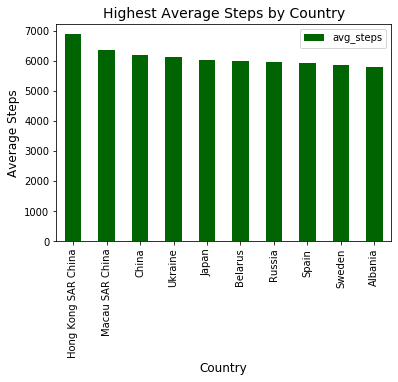

In [145]:
top_10.plot(kind='bar', x='Country', y='avg_steps', color='darkgreen')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Steps', fontsize=12)
plt.title('Highest Average Steps by Country', fontsize=14) #I don't like this title...

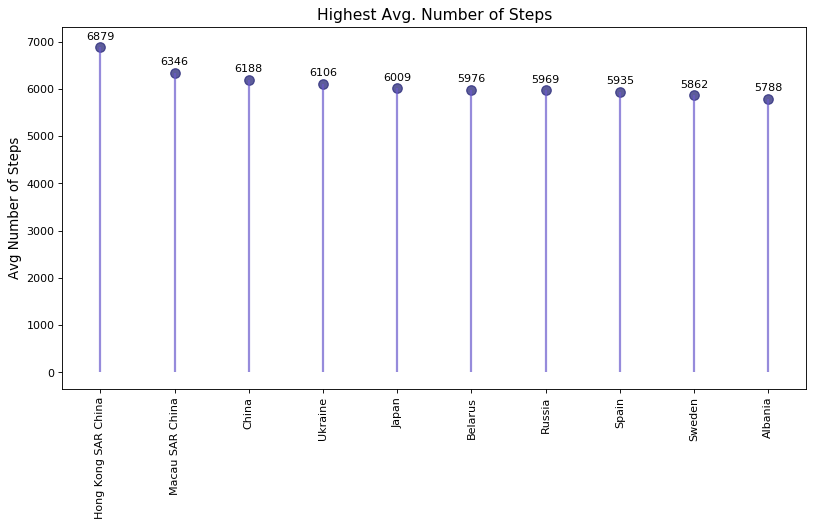

In [146]:
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)
ax.vlines(x=top_10.Country, ymin=0, ymax=top_10.avg_steps, color='slateblue', alpha=0.7, linewidth=2)
ax.scatter(x=top_10.Country, y=top_10.avg_steps, s=75, color='midnightblue', alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel('Avg Number of Steps', fontsize=12)
plt.title('Highest Avg. Number of Steps', fontsize=14)

for row in top_10.itertuples():
    plt.text(row.Index, (row.avg_steps+120), s=row.avg_steps, horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)

### Plot bottom 10 countries with least average steps

In [147]:
bottom_10 = pa.nsmallest(10, 'avg_steps').reset_index(drop=True)
bottom_10.head(10)

,Country,avg_steps,rank
0,El Salvador,3370,111
1,Honduras,3382,110
2,Pakistan,3413,109
3,Indonesia,3513,108
4,Trinidad,3520,107
5,Vietnam,3643,106
6,Venezuela,3645,105
7,Bangladesh,3658,104
8,Libya,3678,103
9,Lebanon,3744,102


Text(0.5, 1.0, 'Lowest Average Steps by Country')

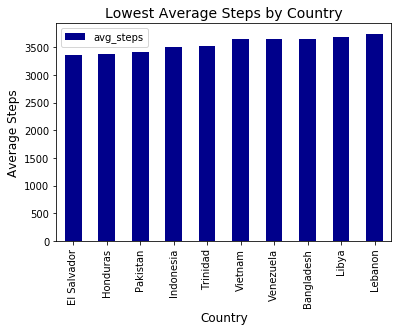

In [148]:
bottom_10.plot(kind='bar', x='Country', y='avg_steps', color='darkblue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Steps', fontsize=12)
plt.title('Lowest Average Steps by Country', fontsize=14) #I don't like this title either...

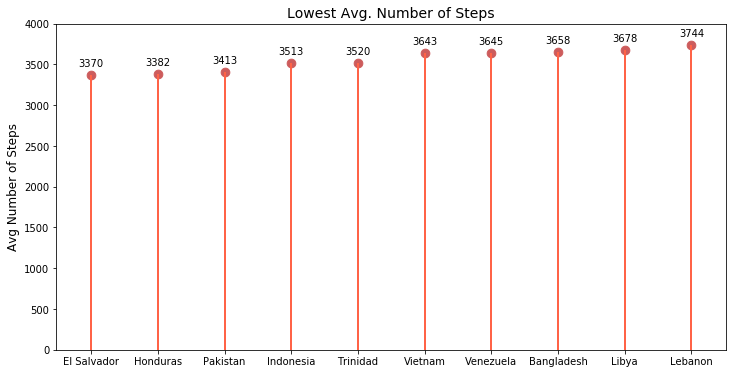

In [149]:
plt.figure(figsize=(12,6))
plt.vlines(x=bottom_10.Country, ymin=0, ymax=bottom_10.avg_steps, color='tomato', linewidth=2)
plt.scatter(x=bottom_10.Country, y=bottom_10.avg_steps, s=75, color='indianred')
plt.ylim((0,4000))
#plt.xticks(rotation=90)
plt.ylabel('Avg Number of Steps', fontsize=12)
plt.title('Lowest Avg. Number of Steps', fontsize=14)

for row in bottom_10.itertuples():
    plt.text(row.Index, (row.avg_steps+80), s=row.avg_steps, horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)

### Average steps per country on a map

In [150]:
data = dict(type = 'choropleth', 
           locations = pa['Country'],
           locationmode = 'country names',
           z = pa['avg_steps'], 
           text = (pa['Country']),
           colorbar = {'title':'Avg. Steps'},
           colorscale = "Spectral")
layout = dict(title = 'Daily Average Steps by Country', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)


### import WHR datasets to merge with physical activity data

In [151]:
whr15 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2015.csv')

In [152]:
whr16 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2016.csv')

In [153]:
whr17 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2017.csv')

In [154]:
whr18 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2018.csv')

In [155]:
whr19 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2019.csv')

In [156]:
pa_whr15 = pa.merge(whr15, on = 'Country', how='inner')

In [157]:
pa_whr16 = pa.merge(whr16, on = 'Country', how='inner')

In [158]:
pa_whr17 = pa.merge(whr17, on = 'Country', how='inner')

In [159]:
whr18 = whr18.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family','Healthy life expectancy':'Health (Life Expectancy)', 
               'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})
pa_whr18 = pa.merge(whr18, on = 'Country', how='inner')

In [160]:
whr19 = whr19.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)', 'Social support':'Family','Healthy life expectancy':'Health (Life Expectancy)', 
               'Freedom to make life choices': 'Freedom', 'Perceptions of corruption':'Trust (Government Corruption)'})
pa_whr19 = pa.merge(whr19, on = 'Country', how='inner')

Text(0.5, 1.0, 'Happiness vs Physical Activity Ranking')

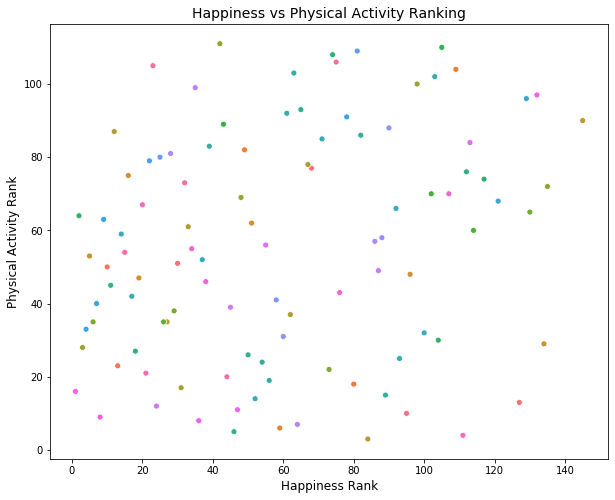

In [161]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Happiness Rank', y='rank', data=pa_whr15, hue='Country', legend=False)
plt.ylabel('Physical Activity Rank', fontsize = 12)
plt.xlabel('Happiness Rank', fontsize=12)
plt.title('Happiness vs Physical Activity Ranking', fontsize=14)


### Next, look at countries by obesity and compare with the Happiness Report and the physical activity

In [162]:
ob = pd.read_csv('./data/countries_by_obesity.csv')

In [199]:
ob.dtypes

rank               int64
Country           object
fraction_obese    object
dtype: object

Text(0.5, 1.0, 'Ranking by Percent Obese')

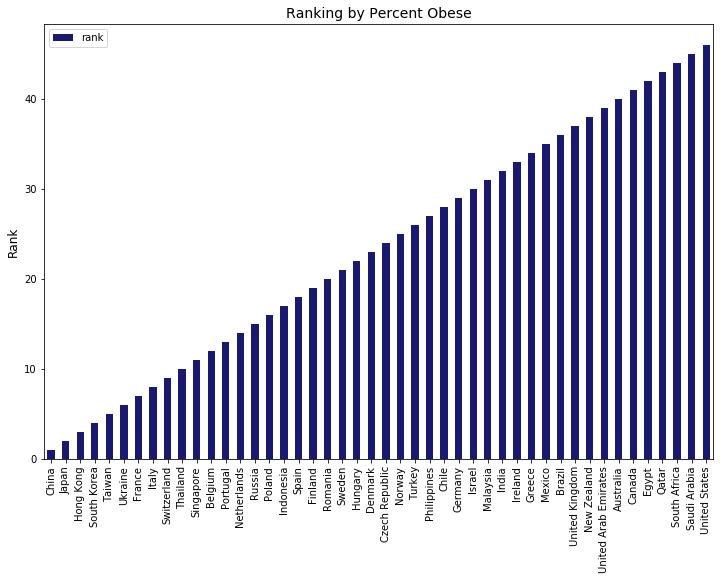

In [164]:
ob.plot(kind='bar', x='Country', figsize=(12,8), color='midnightblue')
plt.xlabel('')
plt.ylabel('Rank', fontsize=12)
plt.title('Ranking by Percent Obese', fontsize=14)

In [165]:
ob_pa = ob.merge(pa, on='Country', how='inner')

In [166]:
ob_pa.head()

,rank_x,Country,fraction_obese,avg_steps,rank_y
0,1,China,3.70%,6188,3
1,2,Japan,5.50%,6009,5
2,4,South Korea,5.90%,5755,11
3,5,Taiwan,6.60%,5000,46
4,6,Ukraine,8.60%,6106,4


Text(0.5, 1.0, 'Obesity vs Activity Rank')

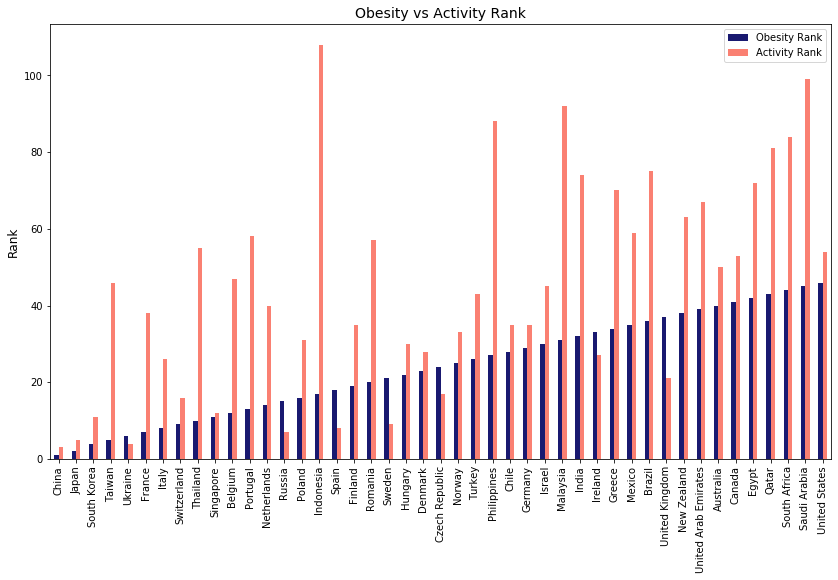

In [168]:
ob_pa.plot(x='Country', y=['rank_x', 'rank_y'], kind='bar', color=('midnightblue', 'salmon'),  figsize=(14,8))
plt.legend(labels=('Obesity Rank', 'Activity Rank'))
plt.xlabel('')
plt.ylabel('Rank', fontsize=12)
plt.title('Obesity vs Activity Rank', fontsize=14)

In [206]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand',
'Australia', 'Sweden', 'Austria')
ob_pa_top = ob_pa.loc[ob_pa.Country.isin(top_countries)]

In [207]:
ob_pa_top

,rank_x,Country,fraction_obese,avg_steps,rank_y
7,9,Switzerland,9.10%,5512,16
12,14,Netherlands,10.40%,5110,40
17,19,Finland,12.30%,5204,35
19,21,Sweden,12.60%,5862,9
21,23,Denmark,12.80%,5262,28
23,25,Norway,13.20%,5245,33
36,38,New Zealand,20.20%,4582,63
38,40,Australia,21.40%,4941,50
39,41,Canada,22.30%,4819,53


Text(0.5, 1.0, 'Obesity vs Activity Rank')

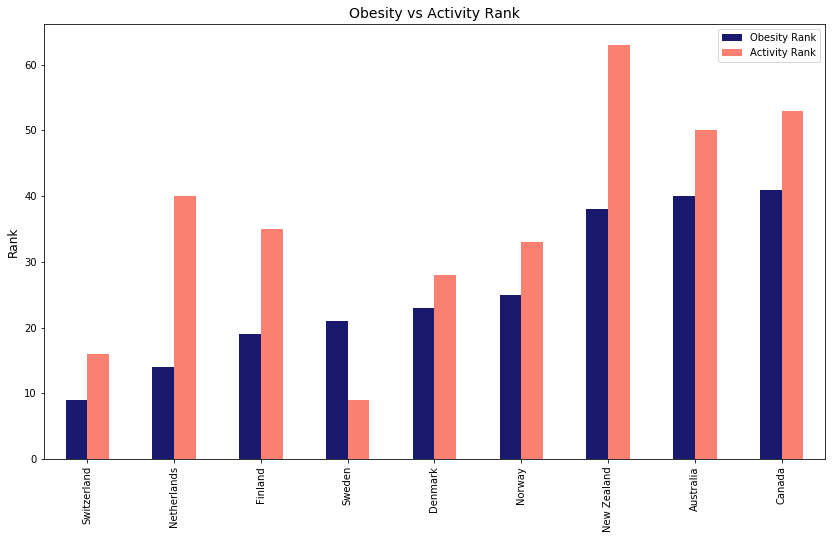

In [208]:
ob_pa_top.plot(x='Country', y=['rank_x', 'rank_y'], kind='bar', color=('midnightblue', 'salmon'),  figsize=(14,8))
plt.legend(labels=('Obesity Rank', 'Activity Rank'))
plt.xlabel('')
plt.ylabel('Rank', fontsize=12)
plt.title('Obesity vs Activity Rank', fontsize=14)

In [169]:
ob_whr15 = ob.merge(whr15, on='Country', how='inner')

In [209]:
ob_pa_top_whr15 = ob_pa_top.merge(whr15, on='Country', how='inner')

In [210]:
ob_pa_top_whr15.head()

,rank_x,Country,fraction_obese,avg_steps,rank_y,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,Switzerland,9.10%,5512,16,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,14,Netherlands,10.40%,5110,40,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
2,19,Finland,12.30%,5204,35,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
3,21,Sweden,12.60%,5862,9,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
4,23,Denmark,12.80%,5262,28,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


Text(0.5, 1.0, 'Obesity vs Activity Rank')

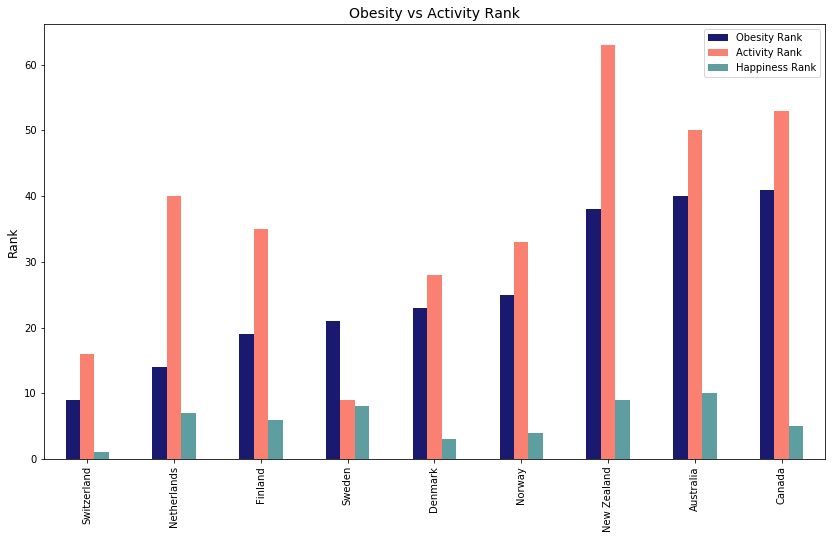

In [213]:
ob_pa_top_whr15.plot(x='Country', y=['rank_x', 'rank_y', 'Happiness Rank'], kind='bar', color=('midnightblue', 'salmon', 'cadetblue'),  figsize=(14,8))
plt.legend(labels=('Obesity Rank', 'Activity Rank', 'Happiness Rank'))
plt.xlabel('')
plt.ylabel('Rank', fontsize=12)
plt.title('Obesity vs Activity Rank', fontsize=14)

In [185]:
ob_whr16 = ob.merge(whr16, on='Country', how='inner')

In [186]:
ob_whr17 = ob.merge(whr17, on='Country', how='inner')

In [187]:
ob_whr18 = ob.merge(whr18, on='Country', how='inner')

In [188]:
ob_whr19 = ob.merge(whr19, on='Country', how='inner')

In [171]:
ob_whr15.head()

,rank,Country,fraction_obese,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,China,3.70%,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
1,2,Japan,5.50%,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
2,3,Hong Kong,5.60%,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
3,4,South Korea,5.90%,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
4,5,Taiwan,6.60%,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323


Text(0.5, 1.0, 'Obesity vs Happiness Rank')

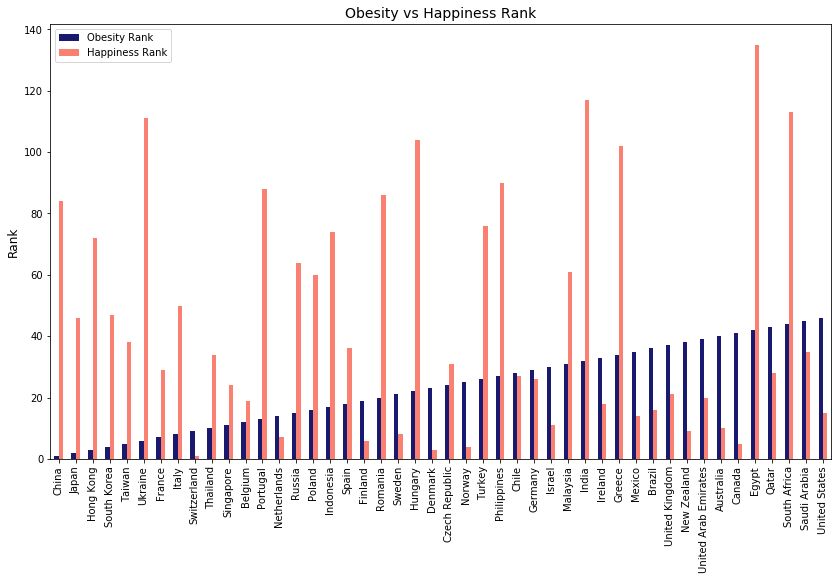

In [184]:
ob_whr15.plot(x='Country', y=['rank', 'Happiness Rank'], kind='bar', color=('midnightblue', 'salmon'), figsize=(14,8))
plt.legend(labels=('Obesity Rank', 'Happiness Rank'))
plt.xlabel('')
plt.ylabel('Rank', fontsize=12)
plt.title('Obesity vs Happiness Rank (2015)', fontsize=14)

Text(0.5, 1.0, 'Obesity vs Happiness Rank (2015)')

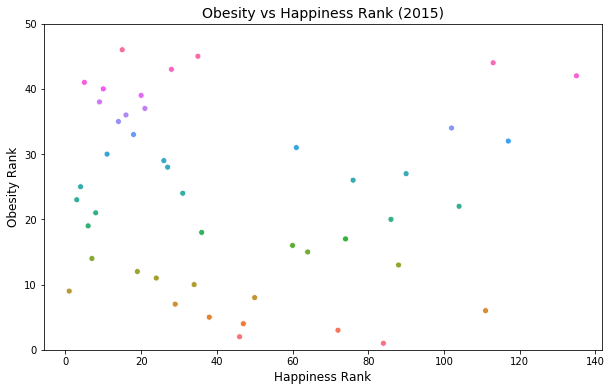

In [179]:
plt.figure(figsize=(10,6))
plt.ylim(0, 50)
sns.scatterplot(data=ob_whr15, x='Happiness Rank',  y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Obesity Rank', fontsize=12)
plt.title('Obesity vs Happiness Rank (2015)', fontsize=14)

Text(0.5, 1.0, 'Obesity vs Happiness Rank (2016)')

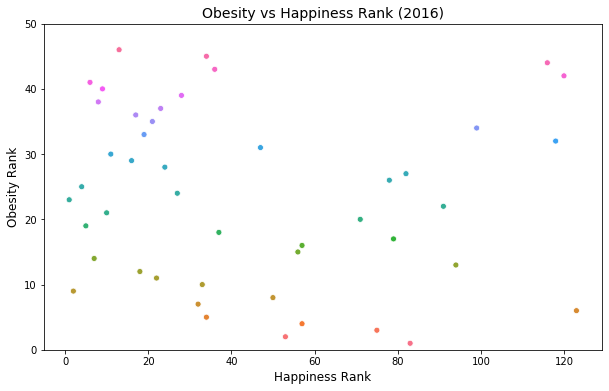

In [190]:
plt.figure(figsize=(10,6))
plt.ylim(0, 50)
sns.scatterplot(data=ob_whr16, x='Happiness Rank',  y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Obesity Rank', fontsize=12)
plt.title('Obesity vs Happiness Rank (2016)', fontsize=14)

Text(0.5, 1.0, 'Obesity vs Happiness Rank (2017)')

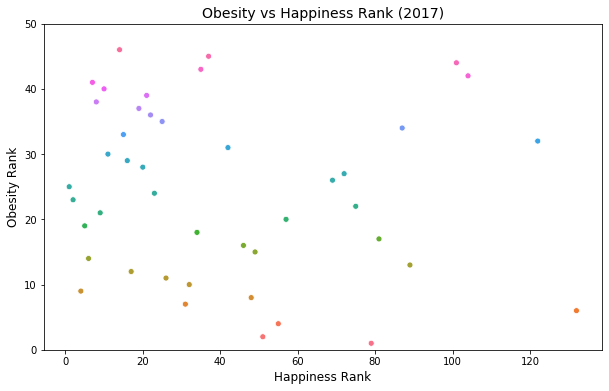

In [192]:
plt.figure(figsize=(10,6))
plt.ylim(0, 50)
sns.scatterplot(data=ob_whr17, x='Happiness.Rank',  y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Obesity Rank', fontsize=12)
plt.title('Obesity vs Happiness Rank (2017)', fontsize=14)

Text(0.5, 1.0, 'Obesity vs Happiness Rank (2018)')

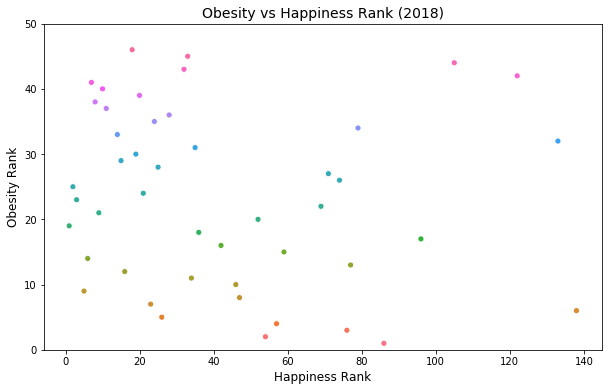

In [193]:
plt.figure(figsize=(10,6))
plt.ylim(0, 50)
sns.scatterplot(data=ob_whr18, x='Happiness Rank',  y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Obesity Rank', fontsize=12)
plt.title('Obesity vs Happiness Rank (2018)', fontsize=14)

Text(0.5, 1.0, 'Obesity vs Happiness Rank (2019)')

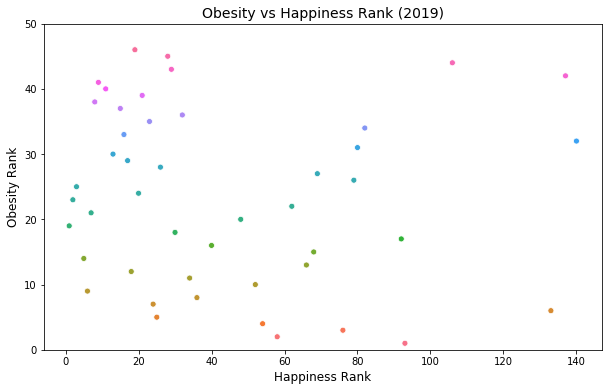

In [194]:
plt.figure(figsize=(10,6))
plt.ylim(0, 50)
sns.scatterplot(data=ob_whr19, x='Happiness Rank',  y='rank', hue='Country', legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Obesity Rank', fontsize=12)
plt.title('Obesity vs Happiness Rank (2019)', fontsize=14)